##インストール

In [2]:
!apt -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!pip install chainer
!pip install cupy-cuda80

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libcusparse8.0 libnvrtc8.0 libnvtoolsext1
0 upgraded, 3 newly installed, 0 to remove and 0 not upgraded.
Need to get 28.9 MB of archives.
After this operation, 71.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libcusparse8.0 amd64 8.0.61-1 [22.6 MB]
Get:2 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libnvrtc8.0 amd64 8.0.61-1 [6,225 kB]
Get:3 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libnvtoolsext1 amd64 8.0.61-1 [32.2 kB]
Fetched 28.9 MB in 2s (14.1 MB/s)
Selecting previously unselected package libcusparse8.0:amd64.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../libcusparse8.0_8.0.61-1_amd64.deb ...
Unpacking libcusparse8.0:amd64 (8.0.61-1) ...
Selecting previously unselected package libnvrtc8.0:amd64.
Prepari

###ChainerCVインストール

In [3]:
!pip install chainercv

    100% |████████████████████████████████| 163kB 4.4MB/s 
  Running setup.py bdist_wheel for chainercv ... - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/d7/97/d3/1fbd4d4cd7aff64a3420daab1eaf32066e01baa6ec682f8481
Successfully built chainercv


##画像ファイル

In [12]:
from google.colab import files
uploaded = files.upload()

Saving 1500626459_header.jpg to 1500626459_header.jpg


In [5]:
!ls

C7CKPciU8AAy65R.jpg  sample_data


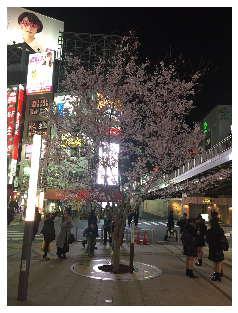

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#画像の読み込み
im = Image.open("C7CKPciU8AAy65R.jpg")

# 座標軸の削除処理
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')



#画像をarrayに変換
im_list = np.asarray(im)
#貼り付け
plt.imshow(im_list)
#表示
plt.show()

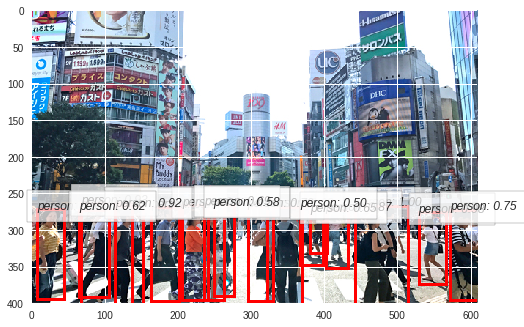

In [19]:
import chainer
 
from chainercv.datasets import voc_bbox_label_names
from chainercv.links import YOLOv2
from chainercv.links import YOLOv3
from chainercv import utils
from chainercv.visualizations import vis_bbox
 
 
def main():
  
    image = "1500626459_header.jpg"
    
    '''
    parser = argparse.ArgumentParser()
    parser.add_argument(
        '--model', choices=('yolo_v2', 'yolo_v3'),
        default='yolo_v2')
    parser.add_argument('--gpu', type=int, default=-1)
    parser.add_argument('--pretrained-model', default='voc0712')
    parser.add_argument('image')
    args = parser.parse_args()
    
    if args.model == 'yolo_v2':
        model = YOLOv2(
            n_fg_class=len(voc_bbox_label_names),
            pretrained_model=args.pretrained_model)
    elif args.model == 'yolo_v3':
        model = YOLOv3(
            n_fg_class=len(voc_bbox_label_names),
            pretrained_model=args.pretrained_model)
 
    if args.gpu &gt;= 0:
        chainer.cuda.get_device_from_id(args.gpu).use()
        model.to_gpu()
 
    '''
 
    model = YOLOv3(
            n_fg_class=len(voc_bbox_label_names),
            pretrained_model = 'voc0712')
    
    gpu = 0 # GPU = 0, CPU = -1
    chainer.cuda.get_device_from_id(gpu).use()
    model.to_gpu()
    
    img = utils.read_image(image, color=True)
    bboxes, labels, scores = model.predict([img])
    bbox, label, score = bboxes[0], labels[0], scores[0]
 
    vis_bbox(
        img, bbox, label, score, label_names=voc_bbox_label_names)
    
    plt.show()
 
 
if __name__ == '__main__':
    main()